In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [11]:
input_data = pd.DataFrame(iris.data,columns =["sepal length","sepal width","petal length","petal width"] )

In [12]:
input_data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
output_data = pd.DataFrame(iris.target,columns=["target"])
output_data.head()

,target
0,0
1,0
2,0
3,0
4,0


In [14]:
input_data.shape

(150, 4)

In [15]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
input_data.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [17]:
output_data.isna().sum()

target    0
dtype: int64

In [18]:
# split the data for training and testing

from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.25,random_state=3)

In [20]:
# import required model
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtc = DecisionTreeClassifier()

In [22]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
pred = dtc.predict(x_test)
pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0])

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
accuracy_score(y_test,pred)

0.9736842105263158

In [29]:
confusion_matrix(y_test,pred)

array([[15,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]], dtype=int64)

### Graphviz
### pydotplus

- pip install graphviz
- conda install graphviz
- pip install pydotplus
- conda install pydotplus

In [30]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [31]:
conda install pydotplus

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

In [33]:
from IPython.display import Image
import pydotplus

In [41]:
dot_data = StringIO()
export_graphviz(dtc,out_file = "irisimage1.dot",feature_names = iris.feature_names,class_names=iris.target_names, rounded= True,filled = True)

In [42]:
dot_data1 = StringIO()
export_graphviz(dtc,out_file =dot_data1, feature_names = iris.feature_names,class_names=iris.target_names, rounded= True,filled = True)

In [43]:
help(export_graphviz)

Help on function export_graphviz in module sklearn.tree.export:

export_graphviz(decision_tree, out_file=None, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)
    Export a decision tree in DOT format.
    
    This function generates a GraphViz representation of the decision tree,
    which is then written into `out_file`. Once exported, graphical renderings
    can be generated using, for example::
    
        $ dot -Tps tree.dot -o tree.ps      (PostScript format)
        $ dot -Tpng tree.dot -o tree.png    (PNG format)
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    Read more in the :ref:`User Guide <tree>`.
    
    Parameters
    ----------
    decision_tree : decision tree regressor or classifier
        The decision tree to be exported to Gra

In [44]:
pydot_plot = pydotplus.graph_from_dot_data(dot_data1.getvalue())

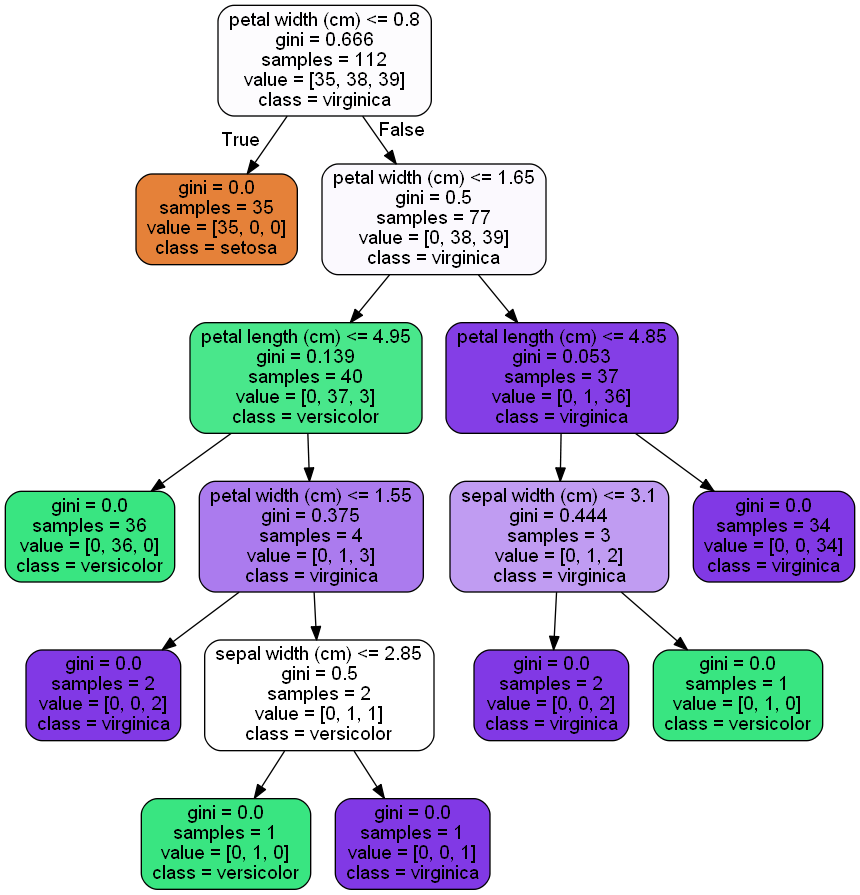

In [45]:
Image(pydot_plot.create_png())